The primary objective of this project is to build and evaluate machine learning models for predicting the presence of heart disease based on a given set of features such as age, sex, blood pressure, cholesterol levels, and other relevant medical data. The goal is to achieve high accuracy while prioritizing sensitivity (recall) to minimize the risk of misdiagnosing individuals with heart disease.

Click here for Dataset Link

Introduction:
Cardiovascular diseases (CVDs) are a leading cause of death globally, and early detection plays a crucial role in improving patient outcomes. Machine learning techniques can be leveraged to analyze various medical parameters and predict the presence or absence of heart disease with high accuracy. This project aims to develop a predictive model that can assist healthcare professionals in identifying individuals at risk of heart disease.



Dataset:
The project will utilize the Heart Disease Dataset from the UCI Machine Learning Repository. This dataset contains 14 features and a binary target variable indicating the presence or absence of heart disease. The features include:

Age
Sex
Chest pain type (4 values)

Resting blood pressure

Serum cholesterol levels

Fasting blood sugar (binary)

Resting electrocardiographic results (3 values)

Maximum heart rate achieved

Exercise-induced angina (binary)

ST depression induced by exercise relative to rest

Slope of the peak exercise ST segment (3 values)

Number of major vessels colored by fluoroscopy (0-4)

Thalassemia (3 values)

Target variable (0 for absence and 1 for presence of heart disease)


Project Stages:

Data Exploration and Preprocessing:
Load the dataset and familiarize yourself with the features and their descriptions.
Check for missing values and handle them appropriately (e.g., imputation or removal).
Perform exploratory data analysis (EDA) to understand the distribution of features, identify outliers, and visualize relationships between features and the target variable.
Handle categorical features using techniques like one-hot encoding or label encoding.
Split the dataset into training and testing sets, ensuring that the class distribution is maintained in both sets.
Consider techniques like feature scaling or transformation (e.g., Box-Cox) if necessary, based on the data distribution.
Feature Engineering (Optional):
Investigate the need for additional features based on domain knowledge or insights from EDA.
Compute new features or transform existing ones if necessary, ensuring that no data leakage occurs during the process.
Model Selection and Training:
Choose appropriate machine learning algorithms for classification tasks, such as Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, or ensemble methods like Gradient Boosting.
Implement the selected algorithms using Python libraries like scikit-learn, XGBoost, or LightGBM.
Split the training data into training and validation sets for hyperparameter tuning.
Use techniques like cross-validation or grid search to find the best hyperparameters for each model, optimizing for sensitivity (recall) or other appropriate metrics.
Train the models on the training data using the optimized hyperparameters.
Model Evaluation:
Evaluate the performance of the trained models using appropriate metrics such as accuracy, precision, recall, and F1-score.
Analyze the performance of each model, considering the trade-off between sensitivity (recall) and specificity in the context of heart disease detection.
Identify the best-performing model based on the evaluation metrics and domain-specific requirements.
Visualize the model's performance using techniques like confusion matrices or ROC curves.
Model Deployment (Optional):
Develop a simple web application or user interface using Streamlit/Gradio to allow users (healthcare professionals or patients) to input their medical data and obtain predictions from the trained model.
Ensure proper handling of user input and provide clear instructions for using the application.
Documentation and Presentation:
Document your project, including the data preprocessing steps, feature engineering (if performed), model selection, training, and evaluation processes.
Explain the rationale behind the choices made at each stage and the trade-offs considered.
Discuss the strengths and limitations of your approach, as well as potential areas for improvement.
Prepare a presentation to showcase your project, highlighting the key findings, the performance of your best model, and the potential impact on healthcare.


Important Considerations:

Emphasize the importance of ethical considerations when working with medical data, such as maintaining patient privacy and ensuring the responsible use of the model's predictions.
Encourage students to explore and experiment with different techniques and approaches throughout the project, fostering critical thinking and problem-solving skills.
Provide guidance and resources for further learning and improvement, such as recommended libraries, tutorials, or online materials.
Discuss the potential implications of false positives and false negatives in the context of heart disease detection, and how the model's performance should be evaluated accordingly.
Consider the interpretability and explainability of the models, as healthcare professionals may need to understand the reasoning behind the predictions.


Submission Guidelines

Project Report (PDF/Word/PPT): Include sections on data exploration, preprocessing, model selection, training, evaluation, and discussion. Use appropriate visualizations and formatting.
Code Files (Python scripts): Include all code for data preprocessing, model training, and evaluation. Code should be well-documented and organized.
Dashboard: Develop PowerBI/Tableau Dashboard
Submission Format: Submit a single compressed folder (ZIP) or provide a shared folder link and upload through LMS.

# ***IMPORTING LIBRARIES AND DEPENDENCES***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')
import os


# ***EXPLORATORY DATA ANALYSIS***

In [4]:
dataset = pd.read_csv("heart_disease.csv")

In [5]:
print(type(dataset))
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
(1025, 14)


In [6]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [74]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
info = ["age","1: male, 0: female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [13]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [15]:
y = dataset["target"].value_counts()

In [16]:
y

target
1    526
0    499
Name: count, dtype: int64

In [17]:
print(dataset["sex"].unique())
print(dataset["sex"].value_counts())

[1 0]
sex
1    713
0    312
Name: count, dtype: int64


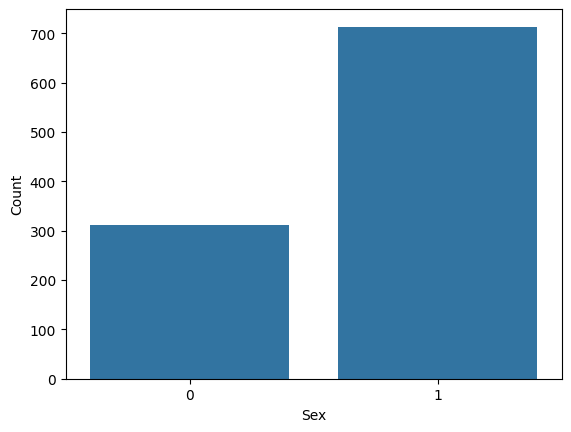

In [18]:
sns.countplot(x='sex', data=dataset)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

[0 1 2 3]


<Axes: xlabel='cp', ylabel='count'>

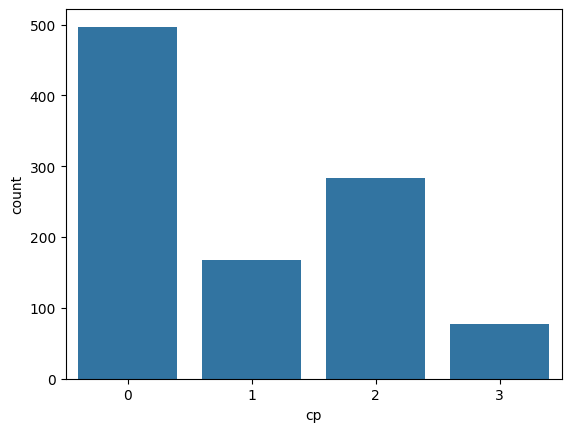

In [19]:
print(dataset["cp"].unique())
sns.countplot(x='cp', data=dataset)

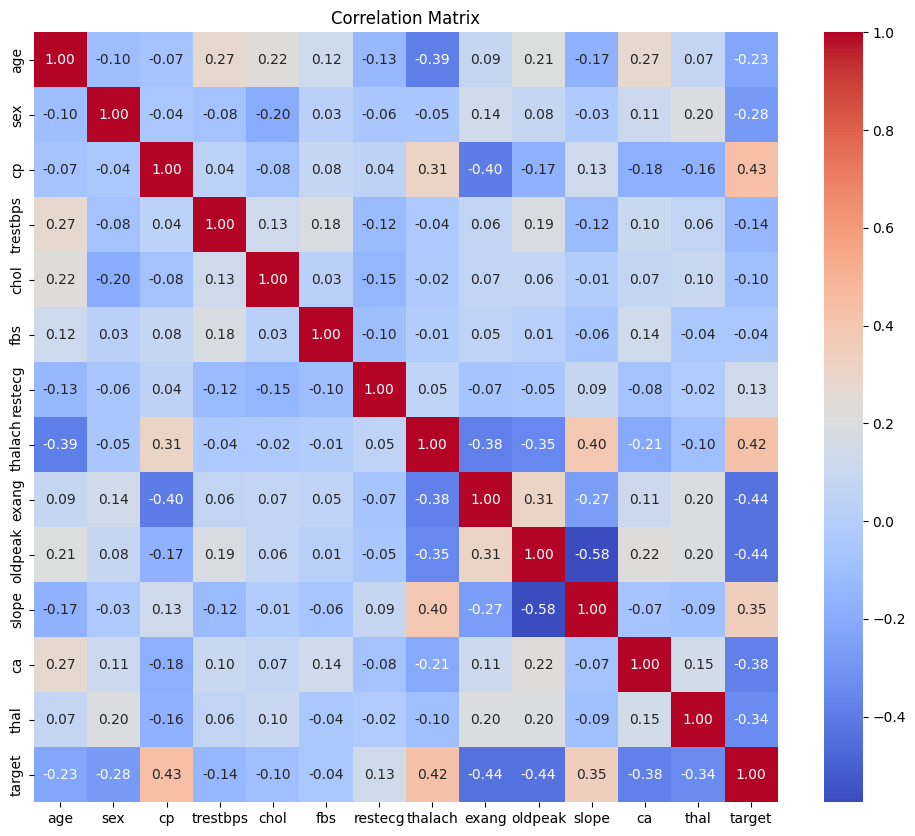

In [20]:
# Correlation matrix
correlation_matrix = dataset.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [22]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


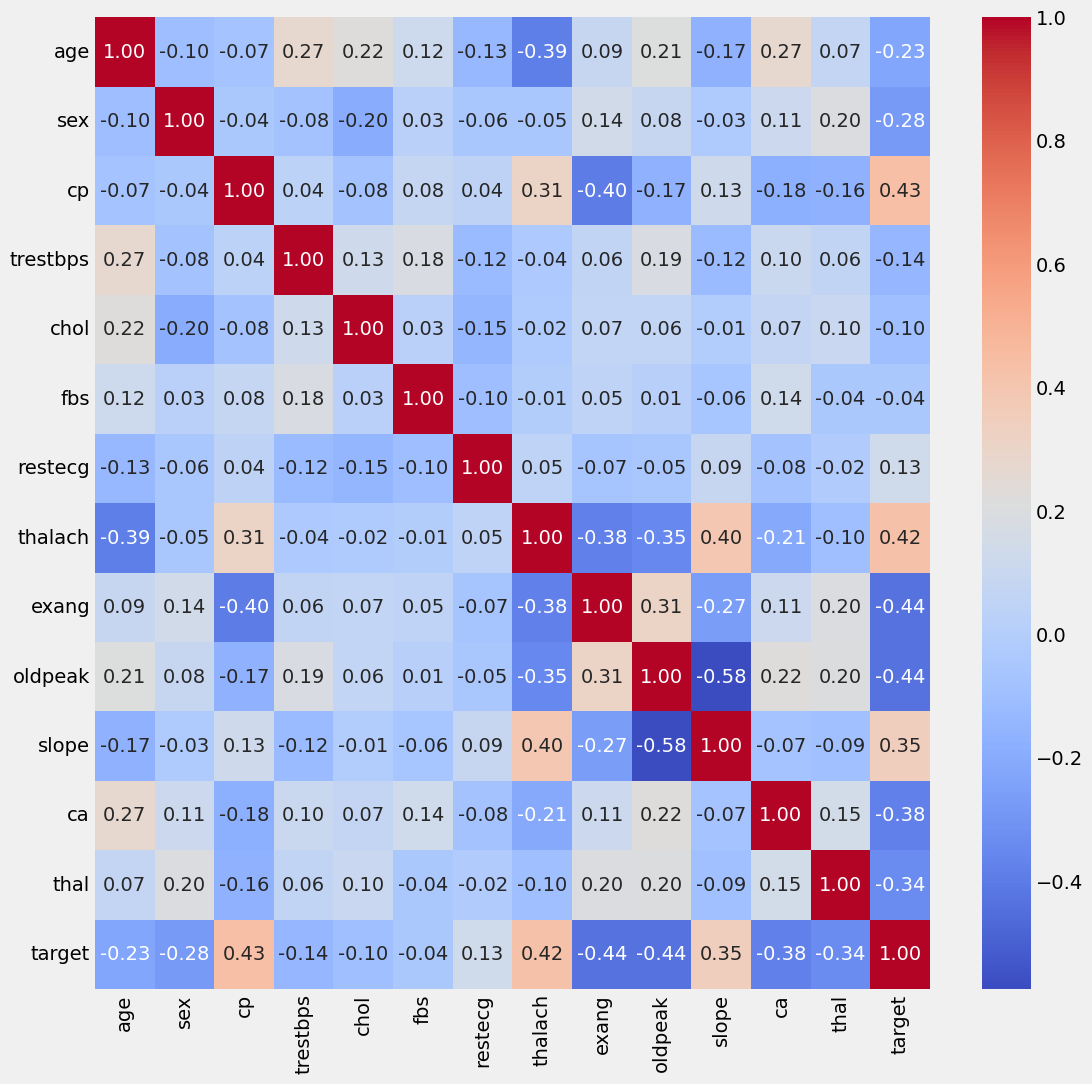

In [23]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(dataset.corr(),annot=True,fmt = ".2f",cmap='coolwarm')
plt.show()

# ***Exploring Age Distribution***

In [24]:
minAge=min(dataset.age)
maxAge=max(dataset.age)
meanAge=dataset.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 54.43414634146342


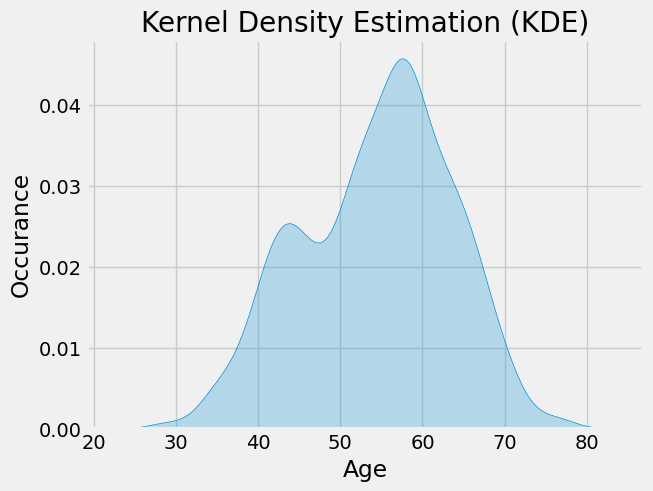

In [25]:
sns.kdeplot(dataset['age'], shade=True)
plt.title('Kernel Density Estimation (KDE)')
plt.xlabel('Age')
plt.ylabel('Occurance')
plt.show()

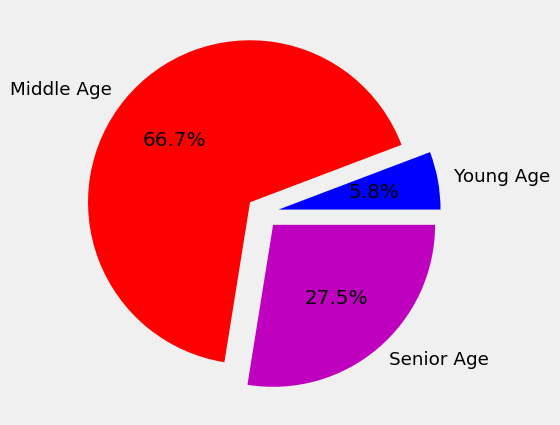

In [26]:
Young = dataset[(dataset.age>=25)&(dataset.age<40)]
Middle = dataset[(dataset.age>=40)&(dataset.age<60)]
Old = dataset[(dataset.age>60)]
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['Young Age','Middle Age','Senior Age'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.show()

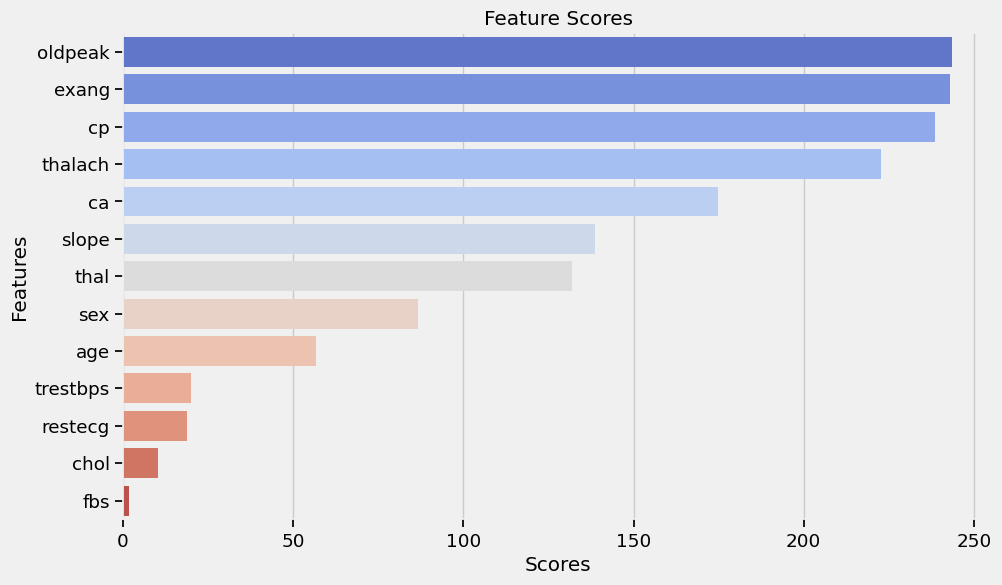

In [27]:
#There is no outliears
# Feature selection using SelectKBest with ANOVA F-value
X = dataset.drop(["target"], axis = 1)
y = dataset["target"]
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='coolwarm')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

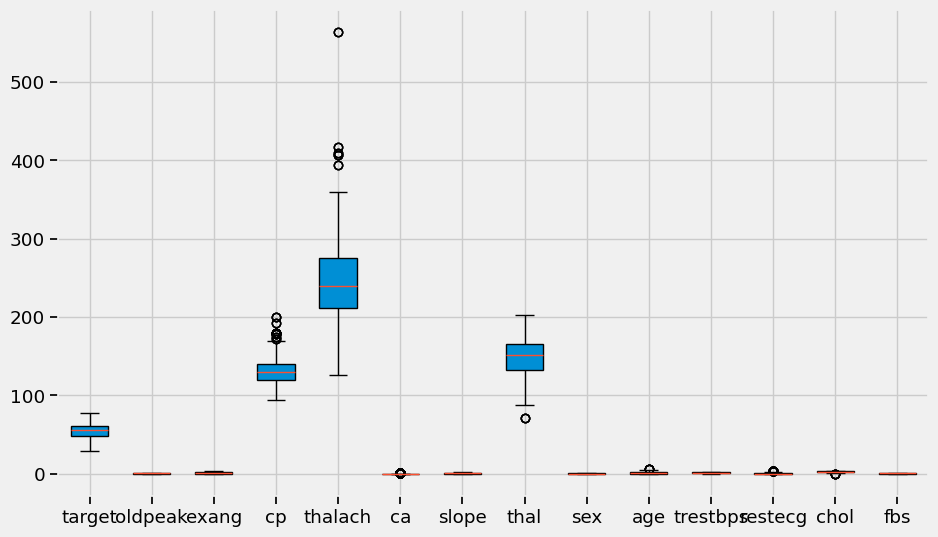

In [28]:
plt.figure(figsize=(10, 6))
bp = plt.boxplot(dataset, widths = 0.6, patch_artist = True, labels = ['target','oldpeak','exang','cp','thalach',
'ca','slope','thal','sex','age','trestbps','restecg','chol','fbs'] )
plt.show()


# ***Exploring Chest Pain and Thalach Features***

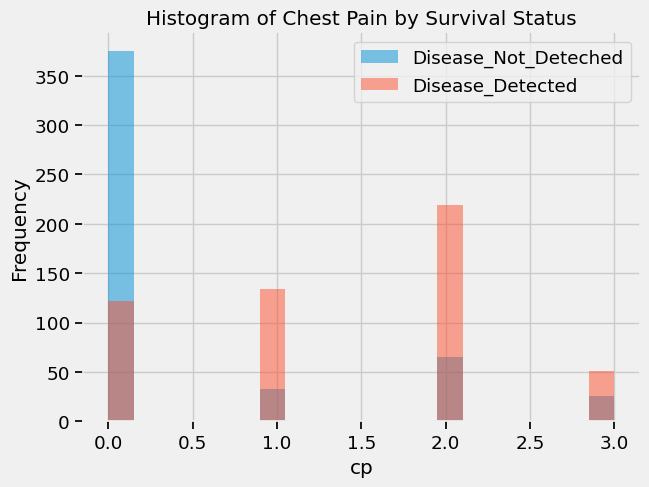

In [29]:
Disease_Not_Deteched = dataset[dataset['target'] == 0]['cp'].dropna()
Disease_Detected = dataset[dataset['target'] == 1]['cp'].dropna()


# Plotting the histograms

plt.hist(Disease_Not_Deteched, bins=20, alpha=0.5, label='Disease_Not_Deteched')
plt.hist(Disease_Detected, bins=20, alpha=0.5, label='Disease_Detected')
# Adding labels and title
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.title('Histogram of Chest Pain by Survival Status')
plt.legend()

# Show the plot
plt.show()

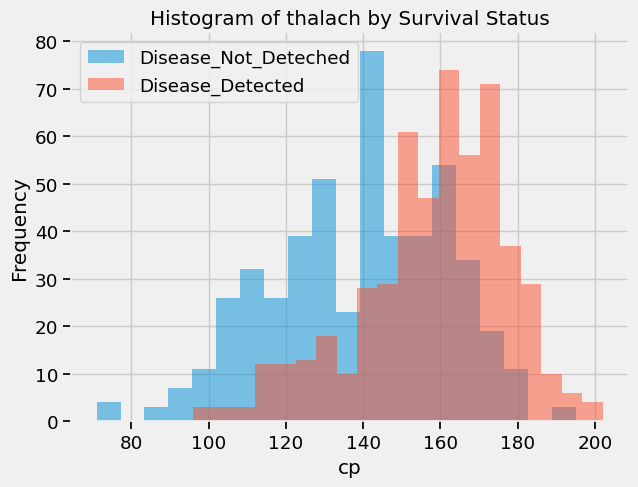

In [30]:
Disease_Not_Deteched = dataset[dataset['target'] == 0]['thalach'].dropna()
Disease_Detected = dataset[dataset['target'] == 1]['thalach'].dropna()


# Plotting the histograms

plt.hist(Disease_Not_Deteched, bins=20, alpha=0.5, label='Disease_Not_Deteched')
plt.hist(Disease_Detected, bins=20, alpha=0.5, label='Disease_Detected')
# Adding labels and title
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.title('Histogram of thalach by Survival Status')
plt.legend()

# Show the plot
plt.show()

chol    Axes(0.08,0.07;0.87x0.81)
dtype: object

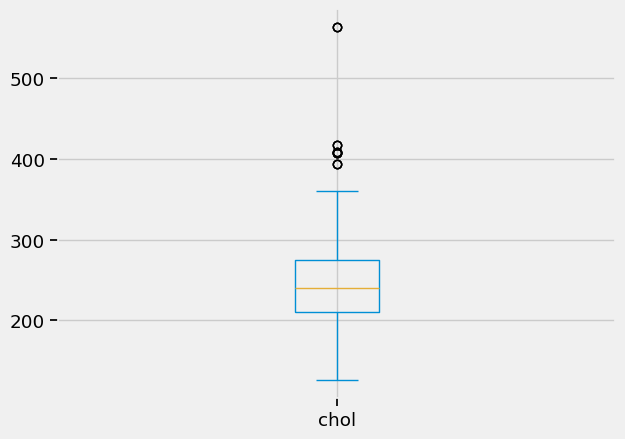

In [31]:
dataset['chol'].plot(kind='box',subplots=True)

===== Skewness =====
age = -0.24886590174584555
trestbps = 0.739768226050074
chol = 1.0740727783354815
thalach = -0.5137771771417209
oldpeak = 1.2108993882065326
ca = 1.2611886429097716


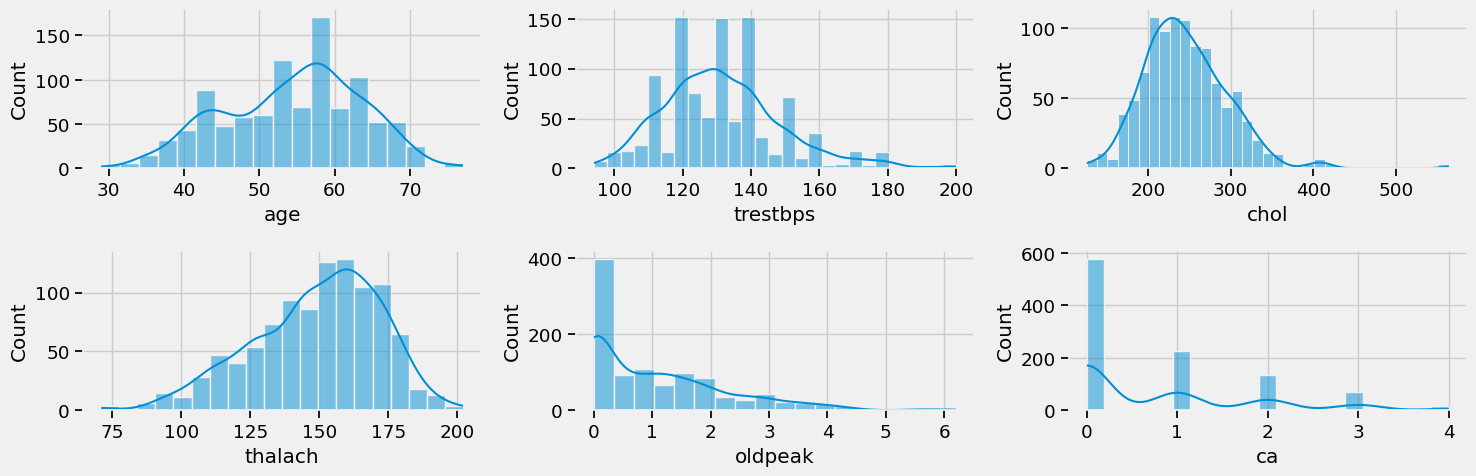

In [32]:

numeric_columns = ['age','trestbps','chol','thalach','oldpeak','ca']

fig, axes = plt.subplots(2,3, figsize=(15,5), sharey= False)
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
skewness = dataset[numeric_columns].skew()

for i, column in enumerate(numeric_columns):
    sns.histplot(x=column, data=dataset, ax=axes[i], kde=True)

print("===== Skewness =====")
for column, skew in zip(numeric_columns, skewness):
    print(f'{column} = {skew}')


plt.tight_layout()

# ***Exploring Exercise Induced Angina (exang) Feature***

In [33]:
dataset["exang"].value_counts()

exang
0    680
1    345
Name: count, dtype: int64

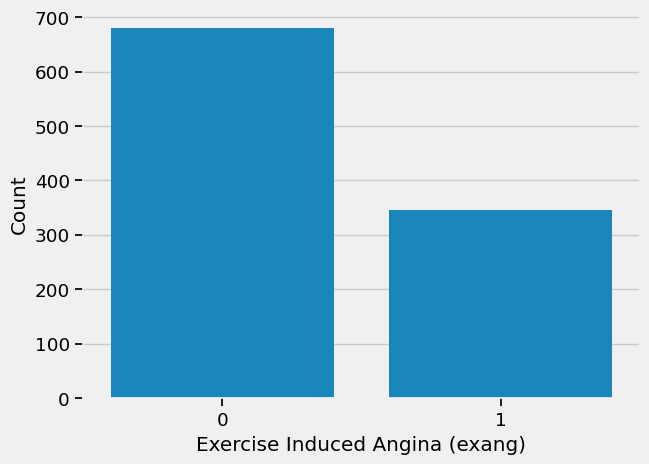

In [34]:
sns.countplot(x='exang', data=dataset)
plt.xlabel('Exercise Induced Angina (exang)')
plt.ylabel('Count')
plt.show()

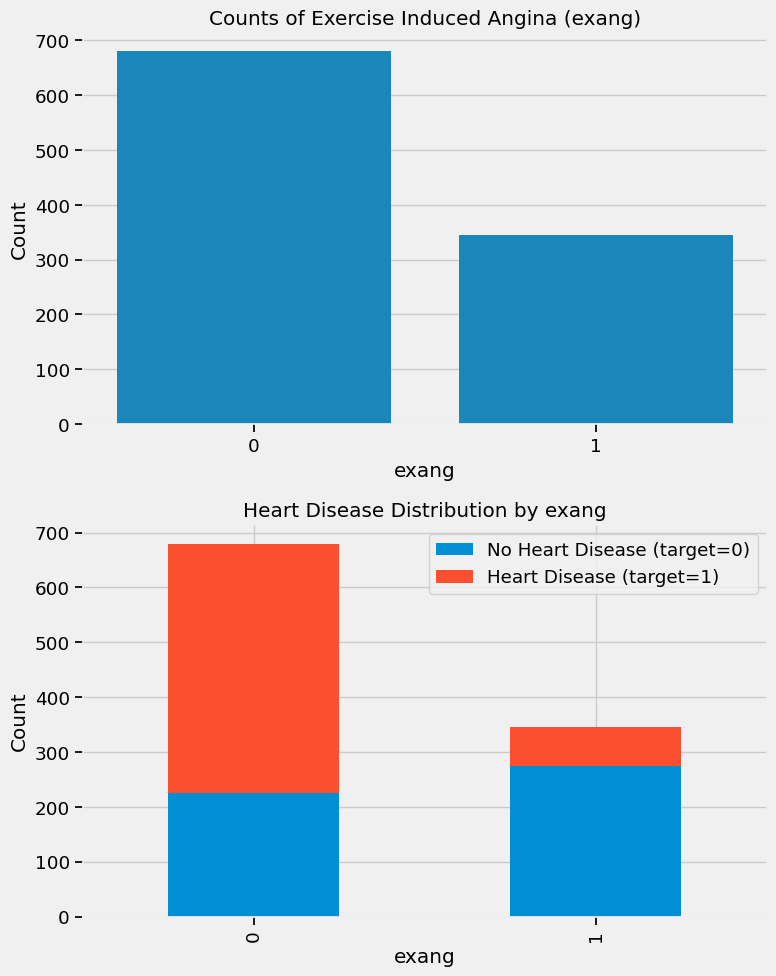

In [35]:
# Calculate counts for exang
exang_counts = dataset['exang'].value_counts().sort_index()

# Calculate counts for exang and target together
exang_target_counts = dataset.groupby(['exang', 'target']).size().unstack(fill_value=0)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plotting the bar plot for exang counts
sns.barplot(x=exang_counts.index, y=exang_counts.values, ax=ax1)
ax1.set_title('Counts of Exercise Induced Angina (exang)')
ax1.set_xlabel('exang')
ax1.set_ylabel('Count')

# Plotting the stacked bar plot for exang vs target
exang_target_counts.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Heart Disease Distribution by exang')
ax2.set_xlabel('exang')
ax2.set_ylabel('Count')
ax2.legend(['No Heart Disease (target=0)', 'Heart Disease (target=1)'])

# Show the plot
plt.tight_layout()
plt.show()


trestbps    Axes(0.08,0.07;0.87x0.81)
dtype: object

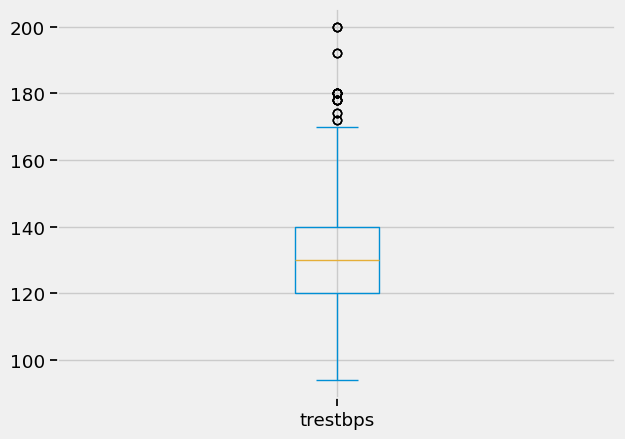

In [36]:
dataset['trestbps'].plot(kind='box',subplots=True)

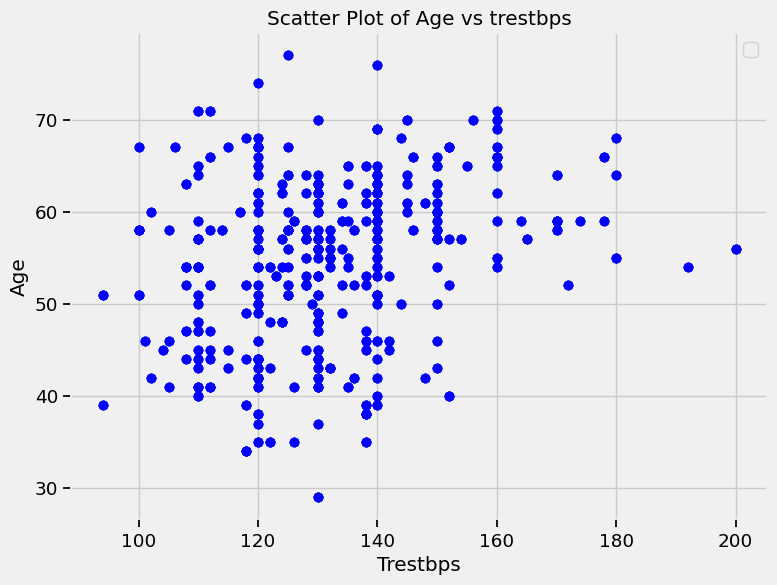

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset['trestbps'], dataset['age'], color='blue')
plt.title('Scatter Plot of Age vs trestbps')
plt.xlabel('Trestbps')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

# ***LOGISTIC REGRESSION***

In [38]:
X = dataset.drop('target', axis = 1)
y = dataset['target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7902439024390244


In [41]:
score = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score)+" %")

The accuracy score achieved using Logistic Regression is: 79.02 %


# ***SVM***

In [42]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
Y_pred_svm = sv.predict(X_test)

In [43]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.49 %


# ***Naive Bayes***

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
Y_pred = nb.predict(X_test)
score_naivebayes = round(accuracy_score(y_pred,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_naivebayes)+" %")

The accuracy score achieved using Naive Bayes is: 79.02 %


# ***DECISION TREES***

In [45]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

score_decision_trees = round(accuracy_score(Y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_decision_trees)+" %")

The accuracy score achieved using Decision Tree is: 98.54 %


In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5338983050847458, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.2902542372881356, 0.8636363636363636, 'x[11] <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.1906779661016949, 0.7727272727272727, 'x[12] <= 2.5\ngini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.09322033898305085, 0.6818181818181818, 'x[8] <= 0.5\ngini = 0.354\nsamples = 100\nvalue = [23, 77]'),
 Text(0.03389830508474576, 0.5909090909090909, 'x[7] <= 96.5\ngini = 0.146\nsamples = 63\nvalue = [5, 58]'),
 Text(0.01694915254237288, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05084745762711865, 0.5, 'x[4] <= 316.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.03389830508474576, 0.4090909090909091, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.06779661016949153, 0.4090909090909091, 'x[9] <= 0.6\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.05084745762711865, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [2

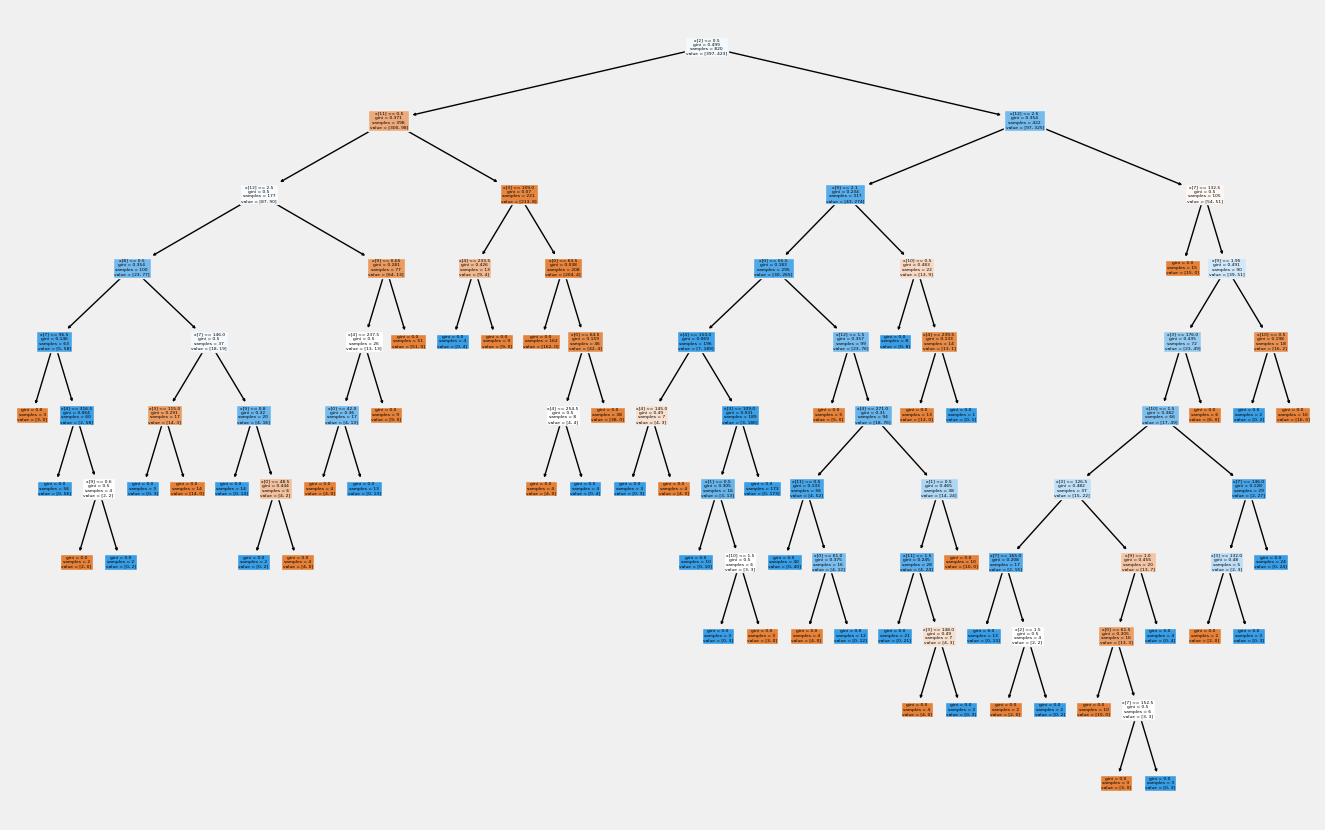

In [55]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled = True)

In [48]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       102
           1       0.75      0.88      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



# ***RANDOM FOREST***

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

score_random_forest = round(accuracy_score(y_pred,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_random_forest)+" %")

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

The accuracy score achieved using Random Forest is: 98.54 %


# ***XGBOOST***

In [58]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

Y_pred_xgb = xgb_model.predict(X_test)

score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 98.54 %


# ***NEURAL NETWORK with RELU AND SIGMOID***

In [59]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 2s 3ms/step - loss: 59.4065 - accuracy: 0.4841
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 44.7620 - accuracy: 0.4841
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 32.1373 - accuracy: 0.4841
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 20.4281 - accuracy: 0.4841
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 9.3885 - accuracy: 0.4805
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 3.0987 - accuracy: 0.4866
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 2.6765 - accuracy: 0.4829
Epoch 8/300
26/26 [==============================] - 0s 3ms/step - loss: 1.7040 - accuracy: 0.5610
Epoch 9/300
26/26 [==============================] - 0s 4ms/step - loss: 1.0729 - accuracy: 0.6659
Epoch 10/300
26/26 [==============================] - 0s 4ms/step - loss: 0.9153 - accuracy: 0.6878
Epoch

In [60]:
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)
print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

7/7 [==============================] - 0s 6ms/step
The accuracy score achieved using Neural Network is: 79.02 %


The accuracy score achieved using Logistic Regression is: 79.02 %
The accuracy score achieved using Support Vector Machine is: 80.49 %
The accuracy score achieved using Naive Bayes is: 79.02 %
The accuracy score achieved using Decision Tree is: 98.54 %
The accuracy score achieved using Random Forest is: 98.54 %
The accuracy score achieved using XGBoost is: 98.54 %
The accuracy score achieved using Neural Network is: 79.02 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

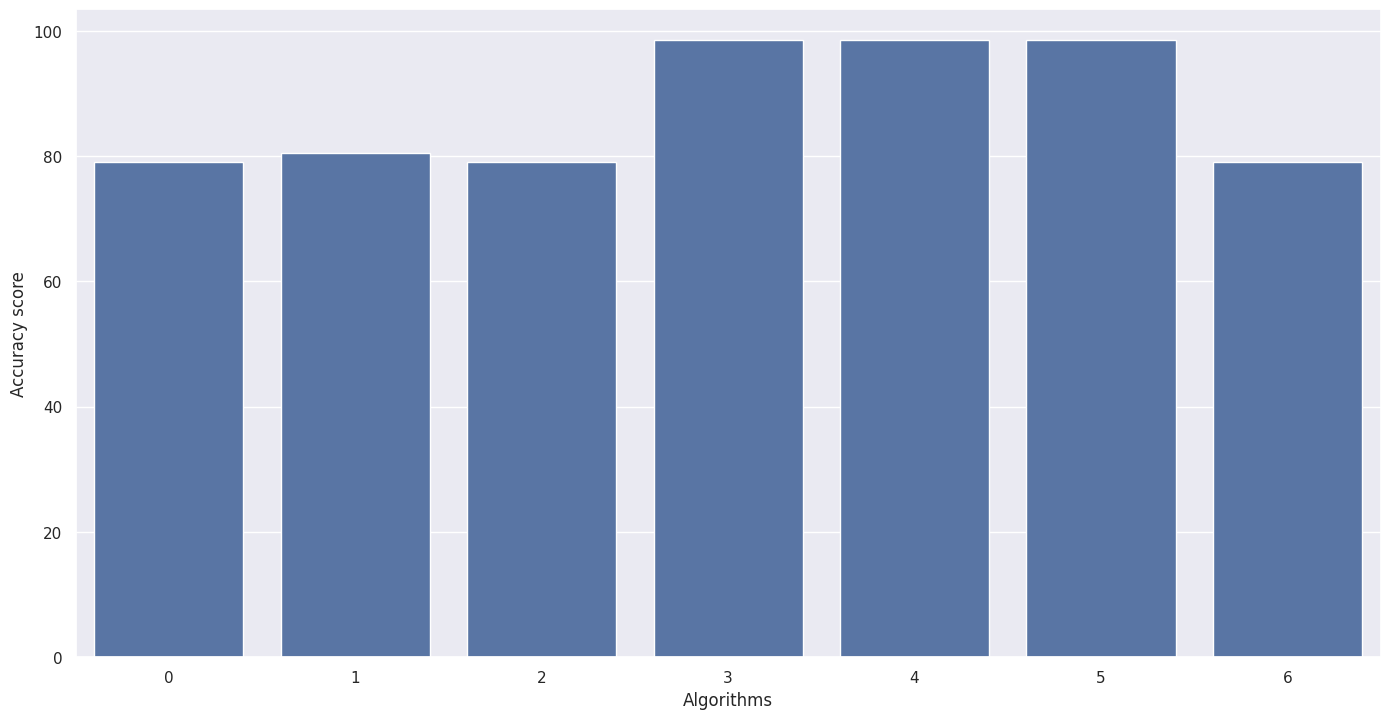

In [64]:
scores = [score,score_svm,score_naivebayes,score_decision_trees,score_random_forest,score_xgb,score_nn]
algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(scores)

# ***Random Forest Classifier ML model. Used Grid Seach for finding best parameters, best accuracy***

In [65]:
parameters = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini']
   }

model = RandomForestClassifier()
clf = GridSearchCV(model, parameters, verbose=2)

In [66]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.4s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.5s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.5s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.5s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.4s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.3s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.3s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.3s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.3s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.3s
[CV] END .....criterion=gini, max_depth=4, max_features=log2; total time=   0.3s
[CV] END .....criterion=gini, max_depth=4, max_f

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [67]:
RFC_best_param = clf.best_params_
print("Best params for RFC:", RFC_best_param)

Best params for RFC: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}


In [69]:
predict = clf.predict(X_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       102
           1       0.93      0.96      0.95       103

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

[[95  7]
 [ 4 99]]


In [70]:
parameters = {
    'max_depth' : [None,4,5,6,7],
    'criterion' :['gini', 'entropy']
   }

model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END .....................criterion=gini, max_depth=None; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 5, 6, 7]},
             verbose=2)

In [71]:
DTC_best_param = clf.best_params_
print("Best params for DTC:", DTC_best_param)
predict = clf.predict(X_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test, predict))

Best params for DTC: {'criterion': 'gini', 'max_depth': None}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]


In [72]:
parameters = {
    'n_neighbors' : [3,5,11,17],
    'weights' :['uniform', 'distance']
   }

model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weig

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 11, 17],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [73]:
KN_best_param = clf.best_params_
print("Best params for KN:", KN_best_param)
predict = clf.predict(X_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test, predict))

Best params for KN: {'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]
